In [1]:
!squeue

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
               533      defq jupyter-   suejit  R 1-15:09:01      1 rsu-training
               554      defq jupyter-    uat03  R       2:44      1 rsu-training


In [5]:
!scontrol show job 485

JobId=485 JobName=jupyter-eg-kernel-slurm-py-conda-b92ac4b6-b639-4f12-be71-615dc2b45054
   UserId=uat03(1008) GroupId=uat03(1008) MCS_label=N/A
   Priority=4294901703 Nice=0 Account=g_proj3 QOS=normal
   JobState=RUNNING Reason=None Dependency=(null)
   Requeue=1 Restarts=0 BatchFlag=1 Reboot=0 ExitCode=0:0
   RunTime=00:01:09 TimeLimit=UNLIMITED TimeMin=N/A
   SubmitTime=2026-01-09T09:04:13 EligibleTime=2026-01-09T09:04:13
   AccrueTime=2026-01-09T09:04:13
   StartTime=2026-01-09T09:04:13 EndTime=Unknown Deadline=N/A
   SuspendTime=None SecsPreSuspend=0 LastSchedEval=2026-01-09T09:04:13 Scheduler=Main
   Partition=defq AllocNode:Sid=rsu-login:1168678
   ReqNodeList=(null) ExcNodeList=(null)
   NodeList=rsu-training
   BatchHost=rsu-training
   NumNodes=1 NumCPUs=4 NumTasks=1 CPUs/Task=4 ReqB:S:C:T=0:0:*:*
   ReqTRES=cpu=4,mem=16G,node=1,billing=4,gres/gpu=1,gres/gpu:1g.18gb=1
   AllocTRES=cpu=4,mem=16G,node=1,billing=4,gres/gpu=1,gres/gpu:1g.18gb=1
   Socks/Node=* NtasksPerN:B:S:C=0:0

In [1]:
!nvidia-smi

Fri Jan  9 09:04:28 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.82.07              Driver Version: 580.82.07      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA H200                    On  |   00000000:77:00.0 Off |                   On |
| N/A   39C    P0             77W /  700W |     102MiB / 143771MiB |     N/A      Default |
|                                         |                        |              Enabled |
+-----------------------------------------+-----

In [2]:
conda env list


# conda environments:
#
# * -> active
# + -> frozen
base                     /cm/shared/apps/miniconda3
myenv                *   /cm/shared/apps/miniconda3/envs/myenv
multiple_gpu             /home/uat03/.conda/envs/multiple_gpu
myenv_uat03              /home/uat03/.conda/envs/myenv_uat03
open-webui               /home/uat03/.conda/envs/open-webui


Note: you may need to restart the kernel to use updated packages.


In [4]:
conda list | grep wlm

cm-jupyter-eg-kernel-wlm       4.0.1             py_0             file:///cm/shared/apps/jupyter/current/share/conda-repo

Note: you may need to restart the kernel to use updated packages.


In [5]:
conda list | grep matplotlib

matplotlib                     3.10.6            py311h06a4308_1
matplotlib-base                3.10.6            py311h71dd3da_1
matplotlib-inline              0.2.1             py311h06a4308_0

Note: you may need to restart the kernel to use updated packages.


Python: 3.11.14


2026-01-09 09:04:48.190069: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-09 09:04:48.220989: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-09 09:04:49.313665: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


All imports successful!
TensorFlow version: 2.20.0
Built with CUDA: True
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorRT: 10.14.1.48.post1
DALI: 1.46.0
cuDF: 24.12.00
GPU computation successful!
Result shape: (1000, 1000)


I0000 00:00:1767924291.399949 1454487 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14474 MB memory:  -> device: 0, name: NVIDIA H200 MIG 1g.18gb, pci bus id: 0000:77:00.0, compute capability: 9.0


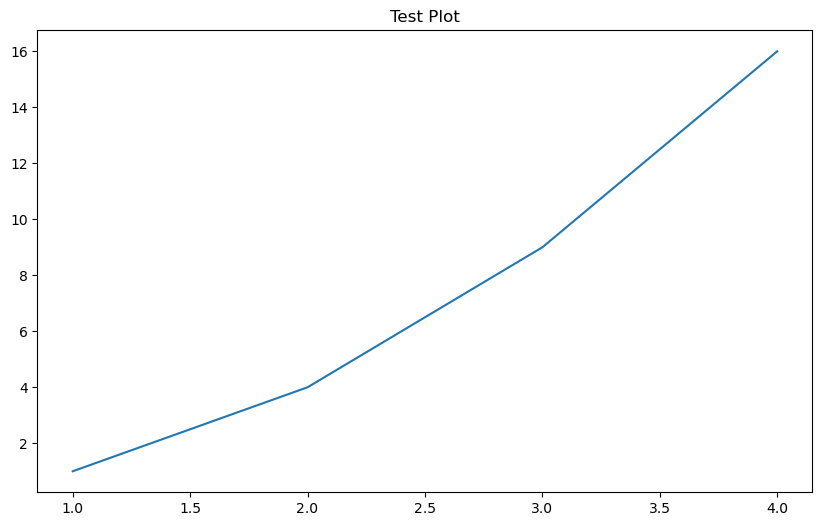

In [3]:
# Cell 1: Check Python and imports
import sys
print(f"Python: {sys.version.split()[0]}")

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("All imports successful!")

# Cell 2: Check TensorFlow GPU
print("TensorFlow version:", tf.__version__)
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("GPUs:", tf.config.list_physical_devices('GPU'))

# Cell 3: Check NVIDIA libraries
try:
    import tensorrt
    print(f"TensorRT: {tensorrt.__version__}")
except:
    print("TensorRT: Not available")

try:
    import nvidia.dali
    print(f"DALI: {nvidia.dali.__version__}")
except:
    print("DALI: Not available")

try:
    import cudf
    print(f"cuDF: {cudf.__version__}")
except:
    print("cuDF: Not available")

# Cell 4: Simple GPU test
with tf.device('/GPU:0'):
    a = tf.random.normal([1000, 1000])
    b = tf.random.normal([1000, 1000])
    c = tf.matmul(a, b)

print("GPU computation successful!")
print(f"Result shape: {c.shape}")

# Cell 5: Plot something
plt.figure(figsize=(10, 6))
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.title("Test Plot")
plt.show()

In [ ]:
# Cell 5: Plot something
plt.figure(figsize=(10, 6))
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.title("Test Plot")
plt.show()

In [2]:
# Cell 1: Check Python and imports
import sys
print(f"Python: {sys.version.split()[0]}")

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Python: 3.11.14


2025-12-07 19:42:54.721097: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-07 19:42:55.004844: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-07 19:42:56.438975: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
print("TensorFlow version:", tf.__version__)
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("GPUs:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.20.0
Built with CUDA: True
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
import tensorrt
print(f"TensorRT: {tensorrt.__version__}")

TensorRT: 10.14.1.48.post1


In [5]:
import nvidia.dali
print(f"DALI: {nvidia.dali.__version__}")

DALI: 1.46.0


In [6]:
import cudf
print(f"cuDF: {cudf.__version__}")

cuDF: 24.12.00


In [ ]:
# Cell 1: Check Python and imports
import sys
print(f"Python: {sys.version.split()[0]}")

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("All imports successful!")

# Cell 2: Check TensorFlow GPU
print("TensorFlow version:", tf.__version__)
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("GPUs:", tf.config.list_physical_devices('GPU'))

# Cell 3: Check NVIDIA libraries
try:
    import tensorrt
    print(f"TensorRT: {tensorrt.__version__}")
except:
    print("TensorRT: Not available")

try:
    import nvidia.dali
    print(f"DALI: {nvidia.dali.__version__}")
except:
    print("DALI: Not available")

try:
    import cudf
    print(f"cuDF: {cudf.__version__}")
except:
    print("cuDF: Not available")

# Cell 4: Simple GPU test
with tf.device('/GPU:0'):
    a = tf.random.normal([1000, 1000])
    b = tf.random.normal([1000, 1000])
    c = tf.matmul(a, b)

print("GPU computation successful!")
print(f"Result shape: {c.shape}")

# Cell 5: Plot something
plt.figure(figsize=(10, 6))
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.title("Test Plot")
plt.show()

Python: 3.11.14


2025-12-07 19:45:38.287696: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-07 19:45:38.546277: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-07 19:45:39.984286: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


All imports successful!
TensorFlow version: 2.20.0
Built with CUDA: True
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorRT: 10.14.1.48.post1
DALI: 1.46.0


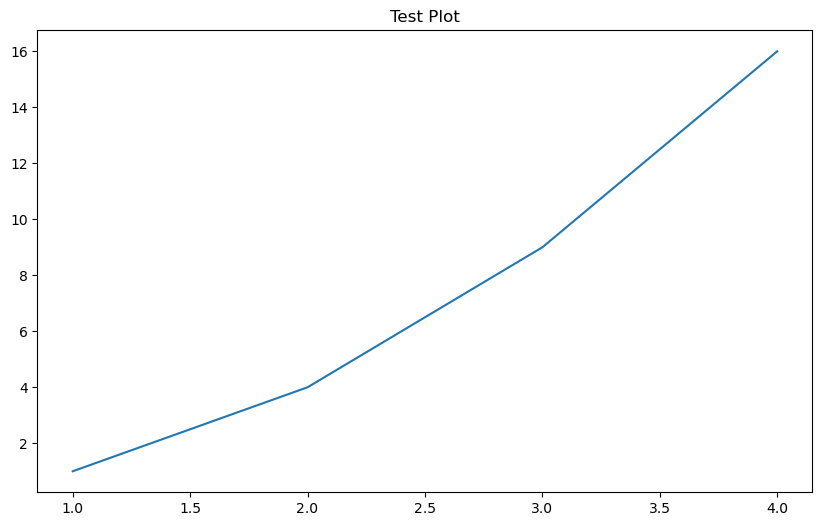

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.title("Test Plot")
plt.show()